# CT scan segmetation using multiple slices per image - Lung dataset

As we are using 2D images to describe 3D CT scans, inevitably we are losing some information about original CT scan.
In this part we will try to give our model more information and still keep using 2D aproach. 
In previous aproach, we were slicing 3D scans and providing each of those slices to the model to learn from them but separately. So, our model doesn't know that slices are actually connected and represent a part of some bigger media.
Now, we will merge each slice with its previous and next slice of CT scan, in order to provide more information to out model during training.

In [17]:
%run ../Data-Preprocessing.ipynb
%run ../U-Net.ipynb
%run ../Train-Eval-Utils.ipynb

import torchvision.transforms as transforms

from torch.utils.data import DataLoader, ConcatDataset

In [11]:
# run if this is the first run of lung segmentation:
# convert_ct_dataset_to_slices('Task06_Lung', 'Lung_Train', 'Lung_Val', 'Lung_Test', val_split=0.1, test_split=0.1, negative_downsampling_rate=5)

In [13]:
transform = transforms.Compose([
    transforms.Resize((128, 128), antialias=False),
    transforms.ConvertImageDtype(torch.float)
])

TRAIN_DIR = 'Lung_Train'

train_dataset = CTDatasetMultiSlices(root_dir=TRAIN_DIR, image_transform=transform, label_transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=os.cpu_count())

VAL_DIR = 'Lung_Val'

val_dataset = CTDatasetMultiSlices(root_dir=VAL_DIR, image_transform=transform, label_transform=transform)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=True, num_workers=os.cpu_count())

TEST_DIR = 'Lung_Test'

test_dataset = CTDatasetMultiSlices(root_dir=TEST_DIR, image_transform=transform, label_transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True, num_workers=os.cpu_count())

## Data preprocessing 

First thing that we need to do is preprocessing data. We already have some part of preprocessing done

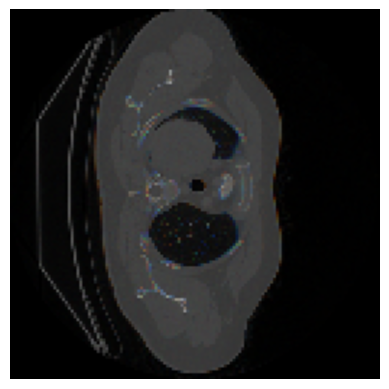

In [14]:
# class demo
image, label = train_dataset.__getitem__(75)

plt.imshow(image.permute(1, 2, 0).numpy())  # No cmap for 3-channel images
plt.axis('off')  # Turn off axis labels
plt.show()

In [19]:
image.shape

torch.Size([3, 128, 128])

In [20]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
criterion = DiceLoss()

Epoch 1/30 started...
Training loss: 0.9917227645230487
Validation loss: 0.995288610458374
...........................................
Epoch 2/30 started...
Training loss: 0.9700567838622303
Validation loss: 0.9847884994966013
...........................................
Epoch 3/30 started...
Training loss: 0.8070124145445785
Validation loss: 0.9920872935542354
...........................................
Epoch 4/30 started...
Training loss: 0.5078194461217741
Validation loss: 0.7019349347662043
...........................................
Epoch 5/30 started...
Training loss: 0.3950869668789995
Validation loss: 0.6407026869279367
...........................................
Epoch 6/30 started...
Training loss: 0.3326105853406394
Validation loss: 0.8848269824628476
...........................................
Epoch 7/30 started...
Training loss: 0.3109635555647253
Validation loss: 0.705130899394
...........................................
Epoch 8/30 started...
Training loss: 0.31154701089471

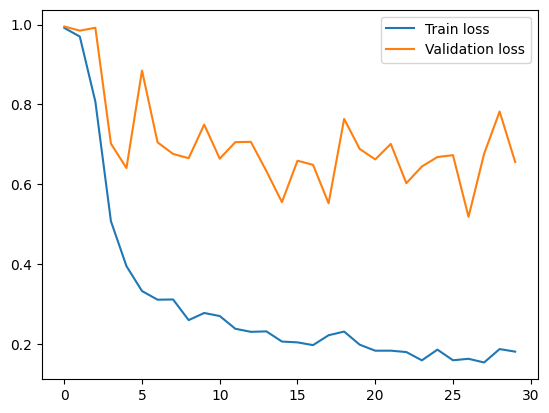

Best loss achieved on the validation set: 0.5184723734855652


In [23]:
model_3 = UNet(depth=3, in_channel=3)
model_3.to(device)
optimizer = torch.optim.Adam(model_3.parameters(), lr=0.001)
_, best_loss = train_loop_with_validation(model_3, 30, train_loader, val_loader, optimizer, criterion)
print(f'Best loss achieved on the validation set: {best_loss}')

In [ ]:
model_4 = UNet(depth=3, in_channel=3)
model_4.to(device)
optimizer = torch.optim.Adam(model_4.parameters(), lr=0.001)
_, best_loss = train_loop_with_validation(model_4, 50, train_loader, val_loader, optimizer, criterion)
print(f'Best loss achieved on the validation set: {best_loss}')

Epoch 1/50 started...
